In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

df=pd.read_csv('colorado_motor_vehicle_sales.csv')
df.head()

,year,quarter,county,sales
0,2008,1,Adams,231609000
1,2008,1,Arapahoe,550378000
2,2008,1,Boulder/Broomfield,176771000
3,2008,1,Denver,200103000
4,2008,1,Douglas,93259000


In [6]:
df['year']=pd.to_datetime(df['year'])

In [7]:
df.isnull().sum()

year       0
quarter    0
county     0
sales      0
dtype: int64

In [8]:
df.dtypes

year       datetime64[ns]
quarter             int64
county             object
sales               int64
dtype: object

In [9]:
df.shape

(501, 4)

In [10]:
df.describe()

,year,quarter,sales
count,501,501.000000,5.010000e+02
mean,1970-01-01 00:00:00.000002011,2.502994,1.760585e+08
min,1970-01-01 00:00:00.000002008,1.000000,6.274000e+06
25%,1970-01-01 00:00:00.000002010,2.000000,6.148200e+07
50%,1970-01-01 00:00:00.000002012,3.000000,1.385820e+08
75%,1970-01-01 00:00:00.000002014,4.000000,2.241580e+08
max,1970-01-01 00:00:00.000002015,4.000000,9.169100e+08
std,NaN,1.120041,1.642055e+08


<Axes: xlabel='year', ylabel='count'>

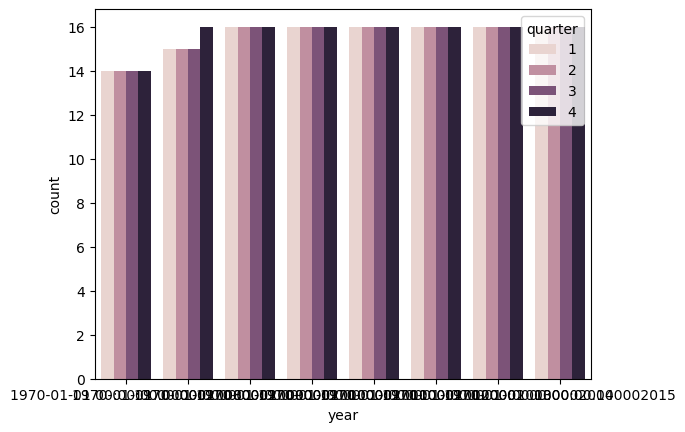

In [11]:
sb.countplot(data=df, x='year', hue='quarter')

<Axes: xlabel='year', ylabel='sales'>

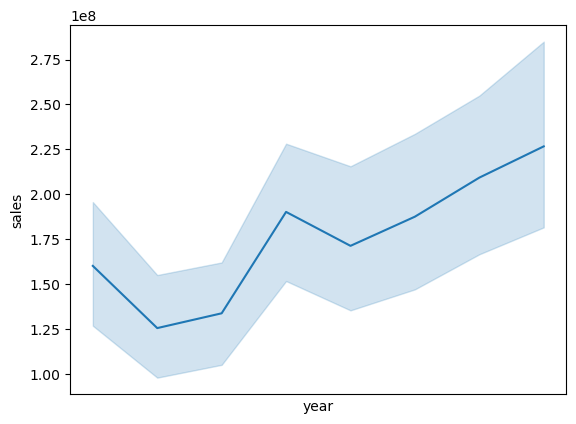

In [12]:
sb.lineplot(data=df, x='year', y='sales')

In [13]:
df['period']=df['year'].astype(str) +'Q' + df['quarter'].astype(str)

In [14]:
df

,year,quarter,county,sales,period
0,1970-01-01 00:00:00.000002008,1,Adams,231609000,1970-01-01 00:00:00.000002008Q1
1,1970-01-01 00:00:00.000002008,1,Arapahoe,550378000,1970-01-01 00:00:00.000002008Q1
2,1970-01-01 00:00:00.000002008,1,Boulder/Broomfield,176771000,1970-01-01 00:00:00.000002008Q1
3,1970-01-01 00:00:00.000002008,1,Denver,200103000,1970-01-01 00:00:00.000002008Q1
4,1970-01-01 00:00:00.000002008,1,Douglas,93259000,1970-01-01 00:00:00.000002008Q1
...,...,...,...,...,...
496,1970-01-01 00:00:00.000002015,4,Larimer,244327000,1970-01-01 00:00:00.000002015Q4
497,1970-01-01 00:00:00.000002015,4,Mesa,88202000,1970-01-01 00:00:00.000002015Q4
498,1970-01-01 00:00:00.000002015,4,Pueblo,94606000,1970-01-01 00:00:00.000002015Q4
499,1970-01-01 00:00:00.000002015,4,Rest of State,157059000,1970-01-01 00:00:00.000002015Q4


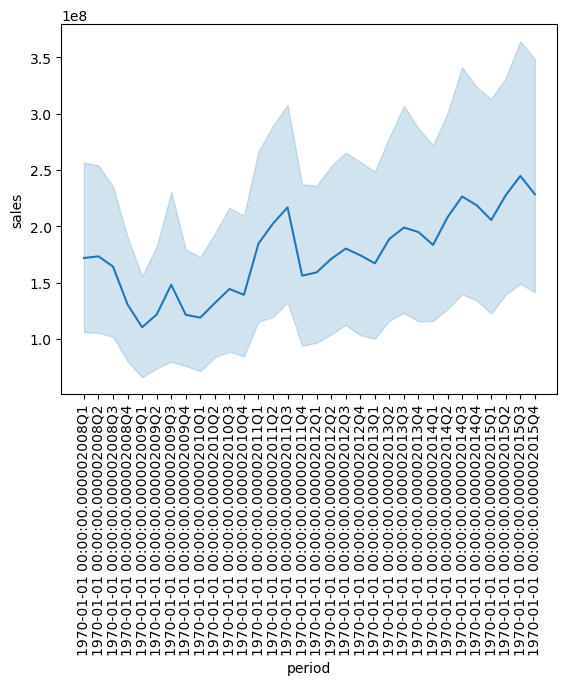

In [15]:
sb.lineplot(data=df, x='period', y='sales')
plt.xticks(rotation=90)
plt.show()

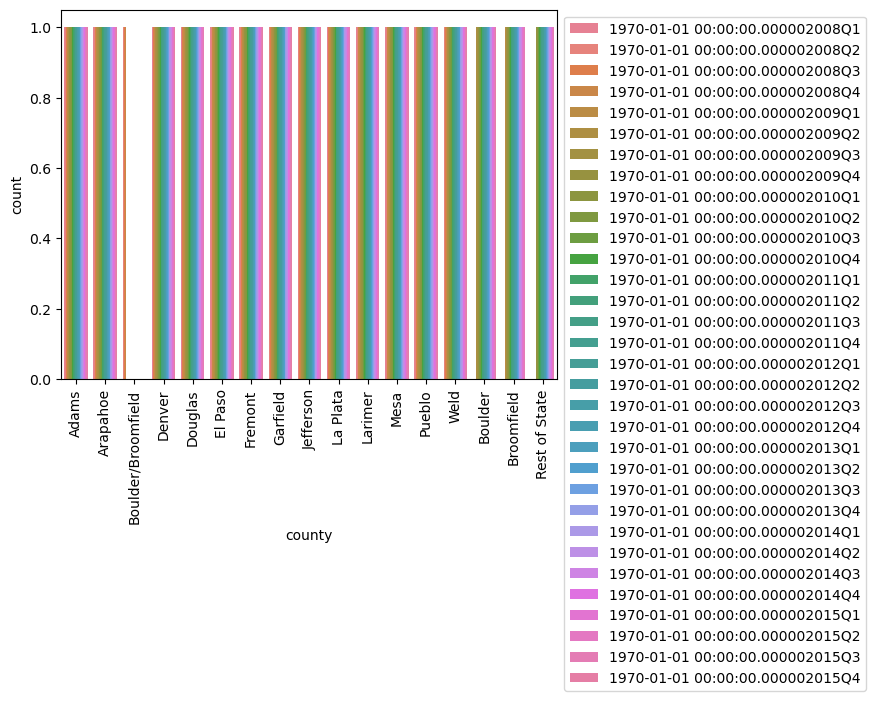

In [16]:
sb.countplot(data=df, x='county', hue='period')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=90)
plt.show()

In [17]:
df=df.drop(columns=['year', 'quarter'])
df

,county,sales,period
0,Adams,231609000,1970-01-01 00:00:00.000002008Q1
1,Arapahoe,550378000,1970-01-01 00:00:00.000002008Q1
2,Boulder/Broomfield,176771000,1970-01-01 00:00:00.000002008Q1
3,Denver,200103000,1970-01-01 00:00:00.000002008Q1
4,Douglas,93259000,1970-01-01 00:00:00.000002008Q1
...,...,...,...
496,Larimer,244327000,1970-01-01 00:00:00.000002015Q4
497,Mesa,88202000,1970-01-01 00:00:00.000002015Q4
498,Pueblo,94606000,1970-01-01 00:00:00.000002015Q4
499,Rest of State,157059000,1970-01-01 00:00:00.000002015Q4


In [18]:
df_sales_per_country=df.groupby('county')['sales'].sum()
df_sales_per_country.sort_values(ascending=False)

county
Arapahoe              20142323000
El Paso               11926044000
Jefferson              9058407000
Adams                  8902115000
Denver                 6763613000
Larimer                5344367000
Weld                   5086889000
Boulder                4742532000
Rest of State          3582170000
Douglas                3236493000
Mesa                   2621436000
Pueblo                 2384044000
Garfield               1600594000
Broomfield             1027326000
La Plata                792807000
Boulder/Broomfield      677201000
Fremont                 316939000
Name: sales, dtype: int64

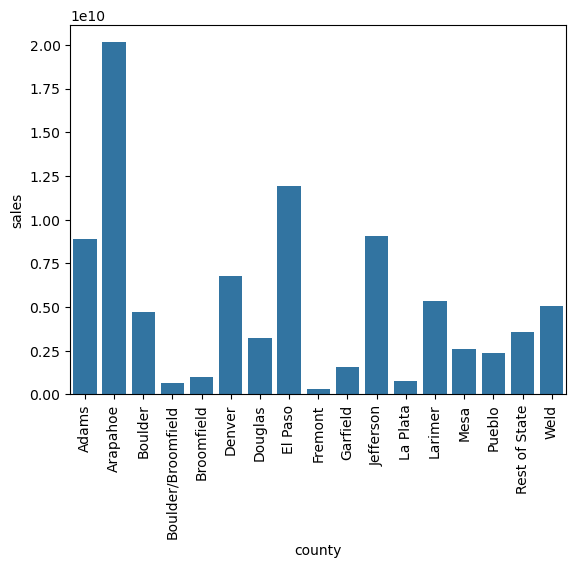

In [19]:
df_sales_per_country=pd.DataFrame(df_sales_per_country).reset_index()

sb.barplot(data=df_sales_per_country, x='county', y='sales')
plt.xticks(rotation=90)
plt.show()

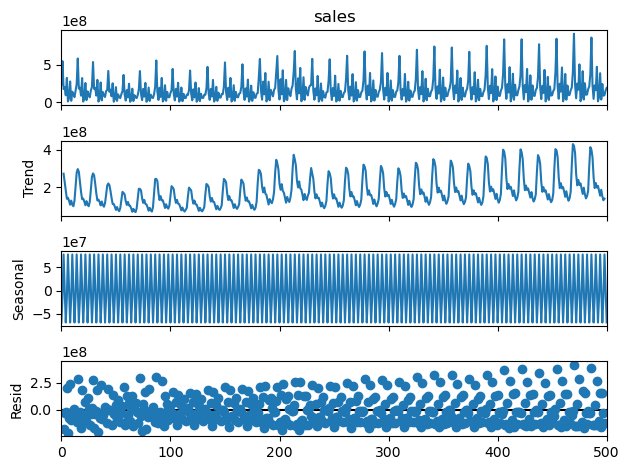

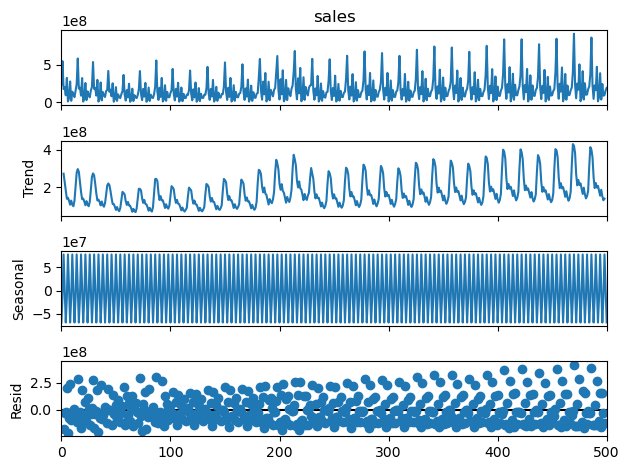

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['sales'], model='additive', period=4)
decomposition.plot()

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df['sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
results = model.fit()

forecast = results.get_forecast(steps=len(df['sales'])) 
forecast_df = forecast.conf_int()
forecast_df['forecast'] = results.predict(start=forecast_df.index[0], end=forecast_df.index[-1])

In [29]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(df['sales'], forecast_df['forecast'])) # Calculating RMSE
print(rmse)

200452997.0663489


<Axes: xlabel='period', ylabel='sales'>

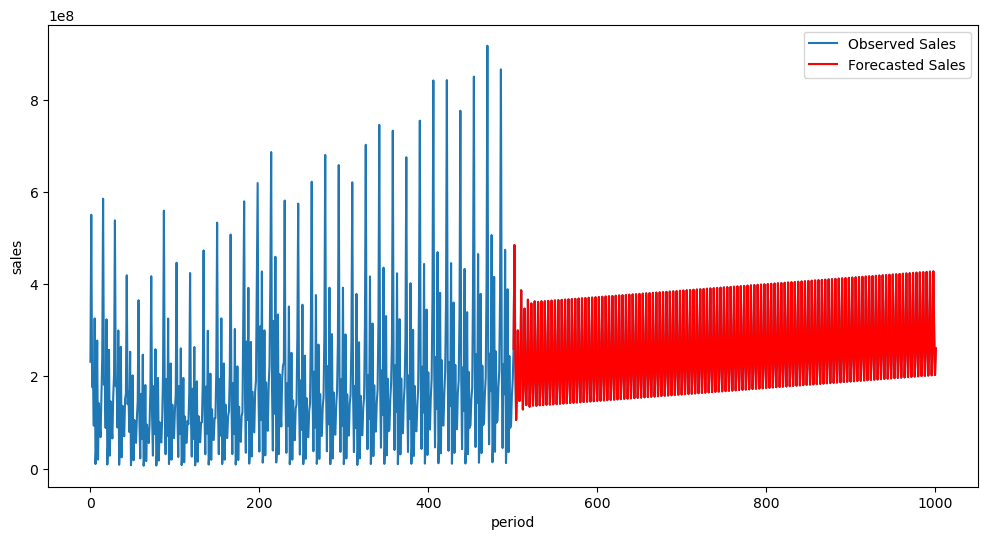

In [35]:
combined_df = pd.concat([df['sales'], forecast_df['forecast']], axis=0)
combined_df = combined_df.reset_index()
combined_df.columns = ['period', 'sales']

# Plot using seaborn
plt.figure(figsize=(12, 6))
sb.lineplot(data=combined_df, x='period', y='sales', label='Observed Sales')
sb.lineplot(data=forecast_df.reset_index(), x='index', y='forecast', label='Forecasted Sales', color='red')